# Stereo Vision

**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

**Reading and Displaying Images**

In [2]:
l1 = cv2.cvtColor(cv2.imread('images/l1.png'), cv2.COLOR_BGR2RGB)
l2 = cv2.cvtColor(cv2.imread('images/l2.png'), cv2.COLOR_BGR2RGB)
l3 = cv2.cvtColor(cv2.imread('images/l3.png'), cv2.COLOR_BGR2RGB)
r1 = cv2.cvtColor(cv2.imread('images/r1.png'), cv2.COLOR_BGR2RGB)
r2 = cv2.cvtColor(cv2.imread('images/r2.png'), cv2.COLOR_BGR2RGB)
r3 = cv2.cvtColor(cv2.imread('images/r3.png'), cv2.COLOR_BGR2RGB)

In [3]:
print(l1.shape)

(289, 382, 3)


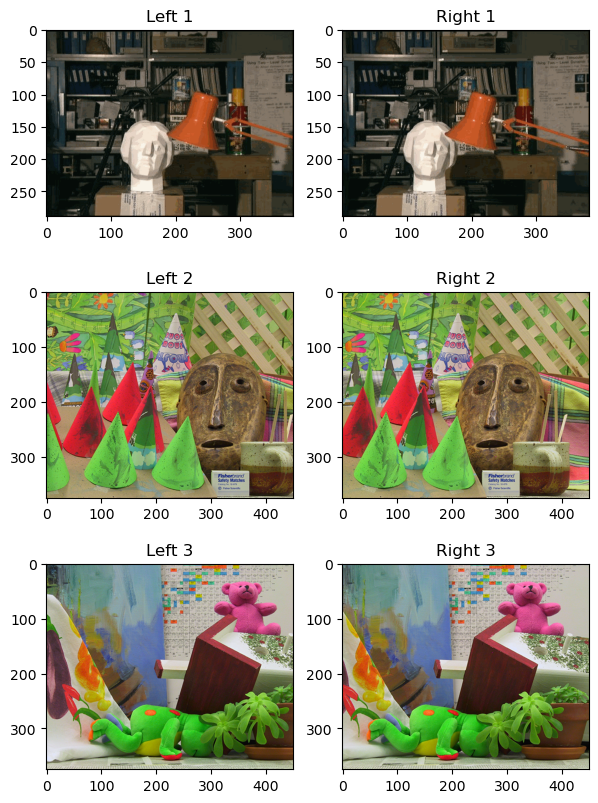

In [4]:
plt.figure(figsize=(7, 10))

ax = plt.subplot(3, 2, 1)
ax.set_title("Left 1")
plt.imshow(l1)

ax = plt.subplot(3, 2, 2)
ax.set_title("Right 1")
plt.imshow(r1)

ax = plt.subplot(3, 2, 3)
ax.set_title("Left 2")
plt.imshow(l2)

ax = plt.subplot(3, 2, 4)
ax.set_title("Right 2")
plt.imshow(r2)

ax = plt.subplot(3, 2, 5)
ax.set_title("Left 3")
plt.imshow(l3)

ax = plt.subplot(3, 2, 6)
ax.set_title("Right 3")
plt.imshow(r3)

**Using grayscale versions of images**

In [5]:
l1 = cv2.cvtColor(l1, cv2.IMREAD_GRAYSCALE)
l2 = cv2.cvtColor(l2, cv2.IMREAD_GRAYSCALE)
l3 = cv2.cvtColor(l3, cv2.IMREAD_GRAYSCALE)
r1 = cv2.cvtColor(r1, cv2.IMREAD_GRAYSCALE)
r2 = cv2.cvtColor(r2, cv2.IMREAD_GRAYSCALE)
r3 = cv2.cvtColor(r3, cv2.IMREAD_GRAYSCALE)

### Block Matching

**Auxiliary Functions**

In [6]:
def check_excel_file(numpy_array, filename):
    import pandas as pd
    df = pd.DataFrame(numpy_array)
    df.to_excel(f"{filename}.xlsx", index=False)
    return

In [7]:
def sum_absolute_differences(submatrix_l, submatrix_r):
    return np.sum(np.abs(submatrix_r - submatrix_l))

In [8]:
def sum_squared_differences(submatrix_l, submatrix_r):
    return np.sum(np.square(submatrix_r - submatrix_l))

In [9]:
def block_matching(img_l, img_r, similarity_measure, window_size=1, search_width=0.125):
    height, width, channels = img_l.shape
    search_length = int(search_width * width)
    disparity_map = np.zeros(img_l.shape[:2])
    for j in range(window_size//2, height - window_size//2):
        #latest_i_r = 0
        for i in range(window_size//2, width - window_size//2):
            #print(j,i)
            i_min = max(window_size//2, i - search_length//2)
            i_max = min(width - window_size//2, i + search_length//2 + 1)
            left_block = img_l[j - window_size//2:j + window_size//2+1, i - window_size//2:i + window_size//2+1]
            min_i_r = -1
            min_cost = np.inf
            for i_r in range(i_min, i_max):
                right_block = img_r[j - window_size//2:j + window_size//2+1, i_r - window_size//2:i_r + window_size//2+1]
                if similarity_measure == "SAD":
                    matching_cost = sum_absolute_differences(left_block, right_block)
                elif similarity_measure == "SSD":
                    matching_cost = sum_squared_differences(left_block, right_block)
                if matching_cost < min_cost:
                    min_cost = matching_cost
                    min_i_r = i_r
            #latest_i_r = min_i_r
            disparity_map[j, i] = np.abs(min_i_r - i)
    return disparity_map

In [10]:
img1disp_sad_w1 = block_matching(l1, r1, "SAD", window_size=1, search_width=0.2)
img1disp_ssd_w1 = block_matching(l1, r1, "SSD", window_size=1, search_width=0.2)
img1disp_sad_w5 = block_matching(l1, r1, "SAD", window_size=5, search_width=0.2)
img1disp_ssd_w5 = block_matching(l1, r1, "SSD", window_size=5, search_width=0.2)
img1disp_sad_w9 = block_matching(l1, r1, "SAD", window_size=9, search_width=0.2)
img1disp_ssd_w9 = block_matching(l1, r1, "SSD", window_size=9, search_width=0.2)

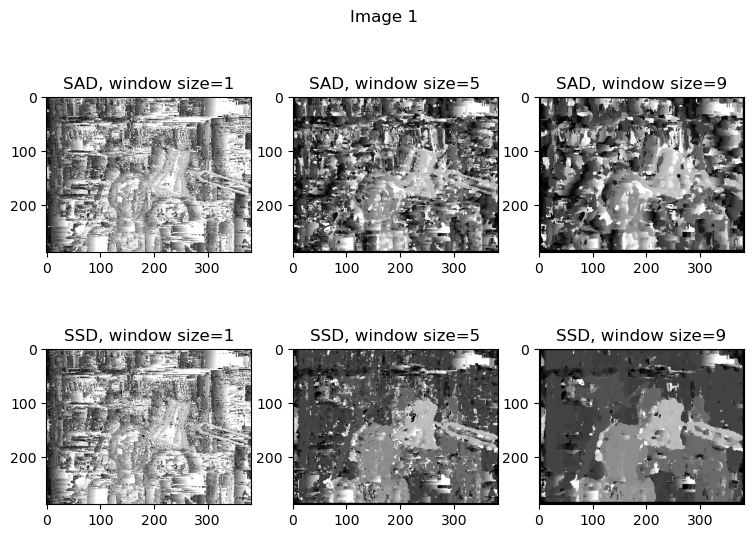

In [11]:
fig = plt.figure(figsize=(9, 6))
fig.suptitle('Image 1')

ax = plt.subplot(2, 3, 1)
ax.set_title("SAD, window size=1")
plt.imshow(img1disp_sad_w1, cmap='gray')

ax = plt.subplot(2, 3, 2)
ax.set_title("SAD, window size=5")
plt.imshow(img1disp_sad_w5, cmap='gray')

ax = plt.subplot(2, 3, 3)
ax.set_title("SAD, window size=9")
plt.imshow(img1disp_sad_w9, cmap='gray')

ax = plt.subplot(2, 3, 4)
ax.set_title("SSD, window size=1")
plt.imshow(img1disp_ssd_w1, cmap='gray')

ax = plt.subplot(2, 3, 5)
ax.set_title("SSD, window size=5")
plt.imshow(img1disp_ssd_w5, cmap='gray')

ax = plt.subplot(2, 3, 6)
ax.set_title("SSD, window size=9")
plt.imshow(img1disp_ssd_w9, cmap='gray')

In [12]:
img2disp_sad_w1 = block_matching(l2, r2, "SAD", window_size=1, search_width=0.25)
img2disp_ssd_w1 = block_matching(l2, r2, "SSD", window_size=1, search_width=0.25)
img2disp_sad_w5 = block_matching(l2, r2, "SAD", window_size=5, search_width=0.25)
img2disp_ssd_w5 = block_matching(l2, r2, "SSD", window_size=5, search_width=0.25)
img2disp_sad_w9 = block_matching(l2, r2, "SAD", window_size=9, search_width=0.25)
img2disp_ssd_w9 = block_matching(l2, r2, "SSD", window_size=9, search_width=0.25)

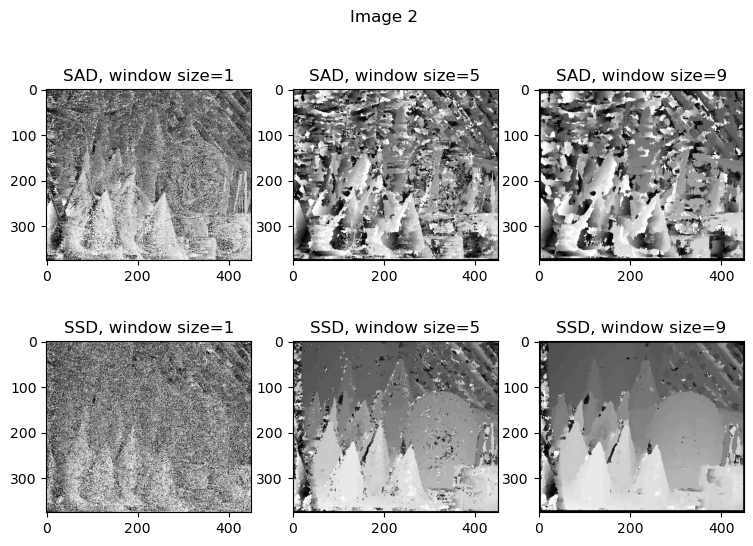

In [13]:
fig = plt.figure(figsize=(9, 6))
fig.suptitle('Image 2')

ax = plt.subplot(2, 3, 1)
ax.set_title("SAD, window size=1")
plt.imshow(img2disp_sad_w1, cmap='gray')

ax = plt.subplot(2, 3, 2)
ax.set_title("SAD, window size=5")
plt.imshow(img2disp_sad_w5, cmap='gray')

ax = plt.subplot(2, 3, 3)
ax.set_title("SAD, window size=9")
plt.imshow(img2disp_sad_w9, cmap='gray')

ax = plt.subplot(2, 3, 4)
ax.set_title("SSD, window size=1")
plt.imshow(img2disp_ssd_w1, cmap='gray')

ax = plt.subplot(2, 3, 5)
ax.set_title("SSD, window size=5")
plt.imshow(img2disp_ssd_w5, cmap='gray')

ax = plt.subplot(2, 3, 6)
ax.set_title("SSD, window size=9")
plt.imshow(img2disp_ssd_w9, cmap='gray')

In [14]:
img3disp_sad_w1 = block_matching(l3, r3, "SAD", window_size=1, search_width=0.25)
img3disp_ssd_w1 = block_matching(l3, r3, "SSD", window_size=1, search_width=0.25)
img3disp_sad_w5 = block_matching(l3, r3, "SAD", window_size=5, search_width=0.25)
img3disp_ssd_w5 = block_matching(l3, r3, "SSD", window_size=5, search_width=0.25)
img3disp_sad_w9 = block_matching(l3, r3, "SAD", window_size=9, search_width=0.25)
img3disp_ssd_w9 = block_matching(l3, r3, "SSD", window_size=9, search_width=0.25)

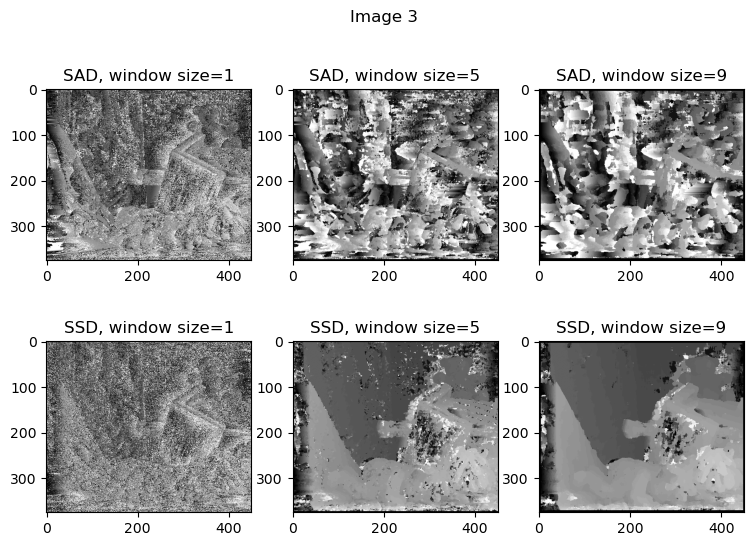

In [15]:
fig = plt.figure(figsize=(9, 6))
fig.suptitle('Image 3')

ax = plt.subplot(2, 3, 1)
ax.set_title("SAD, window size=1")
plt.imshow(img3disp_sad_w1, cmap='gray')

ax = plt.subplot(2, 3, 2)
ax.set_title("SAD, window size=5")
plt.imshow(img3disp_sad_w5, cmap='gray')

ax = plt.subplot(2, 3, 3)
ax.set_title("SAD, window size=9")
plt.imshow(img3disp_sad_w9, cmap='gray')

ax = plt.subplot(2, 3, 4)
ax.set_title("SSD, window size=1")
plt.imshow(img3disp_ssd_w1, cmap='gray')

ax = plt.subplot(2, 3, 5)
ax.set_title("SSD, window size=5")
plt.imshow(img3disp_ssd_w5, cmap='gray')

ax = plt.subplot(2, 3, 6)
ax.set_title("SSD, window size=9")
plt.imshow(img3disp_ssd_w9, cmap='gray')